<a href="https://colab.research.google.com/github/hfelizzola/Curso-Anal-tica-Datos-Corficolombiana/blob/main/Limpieza_y_Preparacion_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Limpieza y Procesamiento de Datos de Contratos de Vías Rurales en Colombia

In [50]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
# Librerias para Ciencia de Datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Models to detect outliers
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import ast

pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

In [52]:
# Conectar con carpeta de Google Colab
from google.colab import drive
drive.mount('/content/drive')
# Setup working directory
os.chdir('/content/drive/MyDrive/Colab Notebooks/Curso Corficolombiana')
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Analisis Exploratorio de Datos - Caso Vías Rurales.ipynb'
'Analisis Exploratorio de Datos - Caso Vías Rurales - Prueba.ipynb'
 correccionDatos.xlsx
'Limpieza y Preparacion de Datos.ipynb'
 sobrecostos.xlsx
 vias_rurales_secop_i_raw_data_v13082024.csv


In [53]:
datos = pd.read_csv('vias_rurales_secop_i_raw_data_v13082024.csv')
datos.head()

,uid,nombre_de_la_entidad,departamento_entidad,orden_entidad,modalidad,causal_contratacion_directa,objeto_a_contratar,detalle_objeto,cuantia_proceso,cuantia_contrato,valor_total_de_adiciones,valor_contrato_con_adiciones,anno_firma,fecha_firma,fecha_ini_ejec_contrato,plazo_de_ejec_del_contrato,rango_de_ejec_del_contrato,tiempo_adiciones_en_dias,tiempo_adiciones_en_meses,fecha_fin_ejec_contrato,id_adjudicacion,urlproceso,nit_de_la_entidad,identificacion_del_contratista,dpto_y_muni_contratista,municipio_entidad,nom_razon_social_contratista,estado_del_proceso
0,15-4-4221275-3896250,LA GUAJIRA - ALCALDIA MUNICIPIO DE BARRANCAS,LA GUAJIRA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,REGIMEN ESPECIAL,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO Y ADECUACION DE LAS VIAS EXISTENT...,51960000,51960000,0,51960000,2015,2015-04-28T00:00:00.000,2015-05-12T00:00:00.000,2,M,0,0,2015-07-12T00:00:00.000,3896250,{'url': 'https://www.contratos.gov.co/consulta...,800099223-3,900514557-1,LA GUAJIRA,BARRANCAS,ASOCIACION DE CAFICULTORES DE BARRANCAS,LIQUIDADO
1,15-11-4173928-3984265,SANTANDER - ALCALDIA MUNICIPIO DE PIEDECUESTA,SANTANDER,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 4,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE LAS VIAS TERCIARIAS DE LA VERE...,149999947,149999946,0,149999946,2015,2015-10-19T00:00:00.000,2015-10-19T00:00:00.000,2,M,0,0,2015-12-19T00:00:00.000,3984265,{'url': 'https://www.contratos.gov.co/consulta...,817000992-5,9008974759,SANTANDER,PIEDECUESTA,UNION TEMPORAL HUELLAS 2015,LIQUIDADO
2,21-11-12612688-12021477,CUNDINAMARCA - ALCALDIA MUNICIPIO DE FOSCA,CUNDINAMARCA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE LA VIA QUE COMUNICA DESDE EL P...,150000000,142967967,0,142967967,2022,2022-03-17T00:00:00.000,2022-07-01T00:00:00.000,8,M,0,0,2023-03-01T00:00:00.000,12021477,{'url': 'https://www.contratos.gov.co/consulta...,899999420,901089904,CUNDINAMARCA,FOSCA,CONTRUCTORA PG S.A.S,LIQUIDADO
3,20-11-10445399-9709897,BOYACA - ALCALDIA MUNICIPIO DE PACHAVITA,BOYACA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MANTENIMIENTO Y MEJORAMIENTO VIAS VEREDALES EN...,162103043,162084746,75000000,237084746,2020,2020-03-10T00:00:00.000,2020-04-01T00:00:00.000,3,M,45,0,2020-08-01T00:00:00.000,9709897,{'url': 'https://www.contratos.gov.co/consulta...,800028461,900485495,BOYACA,PACHAVITA,"SAGA S.A.S, CONSTRUIMOS EL FUTURO",LIQUIDADO
4,20-21-20342-10910037,BOYACA - ALCALDIA MUNICIPIO DE CHIVATA,BOYACA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,LICITACION OBRA PUBLICA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE LA VIA AVENIDA JIMENEZ - PONTE...,467516765,441787828,158201644,599989472,2021,2021-03-08T00:00:00.000,2021-03-11T00:00:00.000,1,M,0,1,2021-05-11T00:00:00.000,10910037,{'url': 'https://www.contratos.gov.co/consulta...,800014989-1,901451682,BOYACA,CHIVATA,UNION TEMPORAL CHIVATA 2020,LIQUIDADO


## Renombrar columnas

In [54]:
# Crear un diccionario para el ajuste en el nombre de las columnas
# nombre_columnas = {'nombre_original':'nombre_ajustado'}
nombres_columnas = {
    'uid': 'uid',
    'estado_del_proceso':'estadoProceso',
    'nombre_de_la_entidad': 'nombreEntidad',
    'nit_de_la_entidad': 'nitEntidad',
    'departamento_entidad': 'departamentoEntidad',
    'municipio_entidad': 'municipioEntidad',
    'orden_entidad': 'nivelEntidad',
    'modalidad': 'modalidadContratacion',
    'causal_contratacion_directa': 'causalContratacionDirecta',
    'objeto_a_contratar': 'categoriaContrato',
    'detalle_objeto': 'descripcionContrato',
    'cuantia_proceso': 'valorProceso',
    'cuantia_contrato': 'valorContrato',
    'valor_total_de_adiciones': 'valorAdicionesContrato',
    'valor_contrato_con_adiciones': 'valorTotalContrato',
    'anno_firma': 'annoFirmaContrato',
    'fecha_firma': 'fechaFirmaContrato',
    'fecha_ini_ejec_contrato': 'fechaInicioEjecucion',
    'plazo_de_ejec_del_contrato': 'duracionContrato',
    'rango_de_ejec_del_contrato': 'rangoDuracionContrato',
    'tiempo_adiciones_en_dias': 'tiempoAdicionesDias',
    'tiempo_adiciones_en_meses': 'tiempoAdicionesMeses',
    'fecha_fin_ejec_contrato': 'fechaFinEjecucion',
    'id_adjudicacion': 'idAdjudicacion',
    'urlproceso': 'urlProceso',
    'identificacion_del_contratista': 'nitContratista',
    'nom_razon_social_contratista': 'nombreContratista',
    'dpto_y_muni_contratista': 'ubicacionContratista'
}

# Aplicar la traducción
datos.rename(columns=nombres_columnas, inplace=True)
datos.head()

,uid,nombreEntidad,departamentoEntidad,nivelEntidad,modalidadContratacion,causalContratacionDirecta,categoriaContrato,descripcionContrato,valorProceso,valorContrato,valorAdicionesContrato,valorTotalContrato,annoFirmaContrato,fechaFirmaContrato,fechaInicioEjecucion,duracionContrato,rangoDuracionContrato,tiempoAdicionesDias,tiempoAdicionesMeses,fechaFinEjecucion,idAdjudicacion,urlProceso,nitEntidad,nitContratista,ubicacionContratista,municipioEntidad,nombreContratista,estadoProceso
0,15-4-4221275-3896250,LA GUAJIRA - ALCALDIA MUNICIPIO DE BARRANCAS,LA GUAJIRA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,REGIMEN ESPECIAL,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO Y ADECUACION DE LAS VIAS EXISTENT...,51960000,51960000,0,51960000,2015,2015-04-28T00:00:00.000,2015-05-12T00:00:00.000,2,M,0,0,2015-07-12T00:00:00.000,3896250,{'url': 'https://www.contratos.gov.co/consulta...,800099223-3,900514557-1,LA GUAJIRA,BARRANCAS,ASOCIACION DE CAFICULTORES DE BARRANCAS,LIQUIDADO
1,15-11-4173928-3984265,SANTANDER - ALCALDIA MUNICIPIO DE PIEDECUESTA,SANTANDER,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 4,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE LAS VIAS TERCIARIAS DE LA VERE...,149999947,149999946,0,149999946,2015,2015-10-19T00:00:00.000,2015-10-19T00:00:00.000,2,M,0,0,2015-12-19T00:00:00.000,3984265,{'url': 'https://www.contratos.gov.co/consulta...,817000992-5,9008974759,SANTANDER,PIEDECUESTA,UNION TEMPORAL HUELLAS 2015,LIQUIDADO
2,21-11-12612688-12021477,CUNDINAMARCA - ALCALDIA MUNICIPIO DE FOSCA,CUNDINAMARCA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE LA VIA QUE COMUNICA DESDE EL P...,150000000,142967967,0,142967967,2022,2022-03-17T00:00:00.000,2022-07-01T00:00:00.000,8,M,0,0,2023-03-01T00:00:00.000,12021477,{'url': 'https://www.contratos.gov.co/consulta...,899999420,901089904,CUNDINAMARCA,FOSCA,CONTRUCTORA PG S.A.S,LIQUIDADO
3,20-11-10445399-9709897,BOYACA - ALCALDIA MUNICIPIO DE PACHAVITA,BOYACA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MANTENIMIENTO Y MEJORAMIENTO VIAS VEREDALES EN...,162103043,162084746,75000000,237084746,2020,2020-03-10T00:00:00.000,2020-04-01T00:00:00.000,3,M,45,0,2020-08-01T00:00:00.000,9709897,{'url': 'https://www.contratos.gov.co/consulta...,800028461,900485495,BOYACA,PACHAVITA,"SAGA S.A.S, CONSTRUIMOS EL FUTURO",LIQUIDADO
4,20-21-20342-10910037,BOYACA - ALCALDIA MUNICIPIO DE CHIVATA,BOYACA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,LICITACION OBRA PUBLICA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE LA VIA AVENIDA JIMENEZ - PONTE...,467516765,441787828,158201644,599989472,2021,2021-03-08T00:00:00.000,2021-03-11T00:00:00.000,1,M,0,1,2021-05-11T00:00:00.000,10910037,{'url': 'https://www.contratos.gov.co/consulta...,800014989-1,901451682,BOYACA,CHIVATA,UNION TEMPORAL CHIVATA 2020,LIQUIDADO


## Asignación de tipos de datos

In [55]:
# Asignar tipos de datos correctos para las columnas
datos = datos.astype({
    'valorProceso': 'float',
    'valorContrato': 'float',
    'valorAdicionesContrato': 'float',
    'valorTotalContrato': 'float',
    'annoFirmaContrato': 'int32',
    'duracionContrato': 'int32',
    'tiempoAdicionesDias': 'int32',
    'tiempoAdicionesMeses': 'int32',
    'fechaFirmaContrato': 'datetime64[ns]',
    'fechaInicioEjecucion': 'datetime64[ns]',
    'fechaFinEjecucion': 'datetime64[ns]',
    'idAdjudicacion': 'object',
    'nitEntidad': 'object',
    'nitContratista': 'object',
    'ubicacionContratista': 'object'
})
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   uid                        979 non-null    object        
 1   nombreEntidad              979 non-null    object        
 2   departamentoEntidad        979 non-null    object        
 3   nivelEntidad               979 non-null    object        
 4   modalidadContratacion      979 non-null    object        
 5   causalContratacionDirecta  979 non-null    object        
 6   categoriaContrato          979 non-null    object        
 7   descripcionContrato        979 non-null    object        
 8   valorProceso               979 non-null    float64       
 9   valorContrato              979 non-null    float64       
 10  valorAdicionesContrato     979 non-null    float64       
 11  valorTotalContrato         979 non-null    float64       
 12  annoFirm

## Corrección de errores en los valores de los contratos

In [56]:
# Corrección manual de errores en los valores de contratos
correcciones = pd.read_excel("correccionDatos.xlsx", sheet_name='valorContratos')
for _, fila in correcciones.iterrows():
    id_contrato = fila['uid']
    datos.loc[datos['uid'] == id_contrato, fila.index[1:]] = fila.values[1:]

## Eliminar registros específicos

In [57]:
# Eliminar manualmente contratos específicos
uids_eliminar = [
    '17-12-7312505-6645201',
    '17-12-7222328-6566950',
    '15-12-4210058-3886615',
    '18-4-8537252-7766100',
    '15-12-3977166-3689414',
    '15-12-3977324-3689541',
    '17-12-7300265-6634055',
    '19-12-9053791-8235792',
    '18-12-8560016-7790587',
    '18-12-8778695-7979822',
    '19-4-10209011-9336255'
]
datos = datos.loc[~datos['uid'].isin(uids_eliminar)]

## Escalar los valores de contratos en términos de salarios mínimos

In [58]:
# Escalar columnas relacionadas con valores a salarios mínimos
columnas_valor = ['valorProceso', 'valorContrato', 'valorAdicionesContrato', 'valorTotalContrato']

salario_minimo = {
    2014: 616000,
    2015: 644350,
    2016: 689455,
    2017: 737717,
    2018: 781242,
    2019: 828116,
    2020: 877803,
    2021: 908526,
    2022: 1000000,
    2023: 1160000,
    2024: 1300000
}

for col in columnas_valor:
    datos[f'{col}_SalarioMinimo'] = datos.apply(lambda x: x[col] / salario_minimo[x['annoFirmaContrato']], axis=1)

In [59]:
# Mostrar el resultado de la conversión de los datos
datos.loc[:, columnas_valor + [f'{col}_SalarioMinimo' for col in columnas_valor]].head()

,valorProceso,valorContrato,valorAdicionesContrato,valorTotalContrato,valorProceso_SalarioMinimo,valorContrato_SalarioMinimo,valorAdicionesContrato_SalarioMinimo,valorTotalContrato_SalarioMinimo
0,51960000.0,51960000.0,0.0,51960000.0,80.639404,80.639404,0.000000,80.639404
1,149999947.0,149999946.0,0.0,149999946.0,232.792655,232.792653,0.000000,232.792653
2,150000000.0,142967967.0,0.0,142967967.0,150.000000,142.967967,0.000000,142.967967
3,162103043.0,162084746.0,75000000.0,237084746.0,184.669046,184.648202,85.440583,270.088785
4,467516765.0,441787828.0,158201644.0,599989472.0,514.588207,486.268778,174.130013,660.398791


## Unificación y conversión de la duración de los contratos

In [60]:
# Convertir la duración del contrato a días y unificar la duración adicional
datos.loc[datos['rangoDuracionContrato'] == 'M', 'duracionContrato'] *= 30


# Unificar duración adicional del contrato
datos['duracionAdicional'] = datos['tiempoAdicionesDias'] + datos['tiempoAdicionesMeses'] * 30

# Calcular duración total del proyecto
datos['duracionTotalContrato'] = datos['duracionContrato'] + datos['duracionAdicional']

# La siguiente línea de código permite eliminar las columnas innecesarias
# datos.drop(columns=['rangoDuracionContrato'], inplace=True)
# datos.drop(columns=['tiempoAdicionesMeses', 'tiempoAdicionesDias'], inplace=True)

## Cálculo de desviaciones y creación de indicadores

In [61]:
# Indicadores de desviaciones
datos['desviacionCosto'] = (datos['valorAdicionesContrato'] > 0).astype(int)
datos['desviacionTiempo'] = (datos['duracionAdicional'] > 0).astype(int)
datos['desviacionTiempoYCosto'] = ((datos['valorAdicionesContrato'] > 0) & (datos['duracionAdicional'] > 0)).astype(int)

In [62]:
# Magnitud de las desviaciones
datos['desviacionPorcentualCosto'] = (datos['valorTotalContrato'] - datos['valorContrato']) / datos['valorContrato']
datos['desviacionPorcentualTiempo'] = (datos['duracionTotalContrato'] - datos['duracionContrato']) / datos['duracionContrato']


In [63]:
# Calcular intensidad del proyecto
datos['intensidadProyecto'] = datos['valorContrato'] / datos['duracionContrato']
datos['intensidadProyecto_SalarioMinimo'] = datos['valorContrato_SalarioMinimo'] / datos['duracionContrato']


In [64]:
# Creación de indicadores adicionales
datos['crecimientoAdjudicacion'] = (datos['valorContrato'] - datos['valorProceso']) / datos['valorProceso']

## Asignación de categorías territoriales y responsables

In [65]:
# Asignar niveles territoriales y responsables
mapeo_niveles_territoriales = {
    'TERRITORIAL DISTRITAL MUNICIPAL NIVEL 1': 'Tipo 1',
    'TERRITORIAL DISTRITAL MUNICIPAL NIVEL 2': 'Tipo 2',
    'TERRITORIAL DISTRITAL MUNICIPAL NIVEL 3': 'Tipo 3',
    'TERRITORIAL DISTRITAL MUNICIPAL NIVEL 4': 'Tipo 4',
    'TERRITORIAL DISTRITAL MUNICIPAL NIVEL 5': 'Tipo 5',
    'TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6': 'Tipo 6',
    'TERRITORIAL DEPARTAMENTAL CENTRALIZADO': 'Departamento Centralizado',
    'TERRITORIAL DEPARTAMENTAL DESCENTRALIZADO': 'Departamento Descentralizado',
    'DISTRITO CAPITAL': 'Distrito Capital',
    'NACIONAL CENTRALIZADO': 'Nacional Centralizado',
    'NACIONAL DESCENTRALIZADO': 'Nacional Descentralizado'
}

datos['nivelEntidad'] = datos['nivelEntidad'].replace(mapeo_niveles_territoriales)

In [66]:
datos.groupby(['nivelEntidad']).size()

,0
nivelEntidad,
Departamento Centralizado,25
Departamento Descentralizado,64
Nacional Centralizado,1
Nacional Descentralizado,1
No Definido,1
Tipo 1,14
Tipo 2,72
Tipo 3,18
Tipo 4,36


In [67]:
# Asignar nivel de la entidad responsable del proyecto
mapeo_responsables = {
    'Tipo 1': 'Municipio',
    'Tipo 2': 'Municipio',
    'Tipo 3': 'Municipio',
    'Tipo 4': 'Municipio',
    'Tipo 5': 'Municipio',
    'Tipo 6': 'Municipio',
    'Departamento Centralizado': 'Departamento',
    'Departamento Descentralizado': 'Departamento',
    'Distrito Capital': 'Distrito Capital',
    'Nacional Centralizado': 'Entidad Nacional'
}

datos['nivelGobiernoResponsable'] = datos['nivelEntidad'].replace(mapeo_responsables)

In [68]:
datos.groupby(['nivelGobiernoResponsable']).size()

,0
nivelGobiernoResponsable,
Departamento,89
Entidad Nacional,1
Municipio,886
Nacional Descentralizado,1
No Definido,1


## Asignación de regiones geográficas

In [69]:
# Asignar regiones según el departamento
AMAZONIA = ['AMAZONAS', 'CAQUETA', 'PUTUMAYO', 'GUAINIA', 'GUAVIARE', 'VAUPES']
ORINOQUIA = ['META', 'ARAUCA', 'CASANARE', 'VICHADA']
ANDINA = ['ANTIOQUIA', 'BOYACA', 'CALDAS', 'CUNDINAMARCA', 'HUILA', 'NORTE DE SANTANDER', 'QUINDIO', 'RISARALDA', 'SANTANDER', 'TOLIMA', 'BOGOTA D.C.']
CARIBE = ['ATLANTICO', 'BOLIVAR', 'CESAR', 'CORDOBA', 'LA GUAJIRA', 'MAGDALENA', 'SUCRE', 'SAN ANDRES, PROVIDENCIA Y SANTA CATALINA']
PACIFICA = ['CAUCA', 'VALLE DEL CAUCA', 'CHOCO', 'NARINO']

datos['regionEntidad'] = datos['departamentoEntidad'].apply(lambda x: 'AMAZONIA' if x in AMAZONIA else
                                                                      'ORINOQUIA' if x in ORINOQUIA else
                                                                      'ANDINA' if x in ANDINA else
                                                                      'CARIBE' if x in CARIBE else
                                                                      'PACIFICA' if x in PACIFICA else
                                                                      'OTRA')


In [70]:
datos['regionEntidad'].value_counts()

,count
regionEntidad,
ANDINA,733
PACIFICA,96
ORINOQUIA,73
CARIBE,45
AMAZONIA,30
OTRA,1


## Tipo de Proceso de Contratación

In [71]:
# Categorizar el método de contratación
tipo_proceso = {
    'CONTRATACION DIRECTA (LEY 1150 DE 2007)': 'Cerrado',
    'REGIMEN ESPECIAL': 'Régimen Especial',
    'SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150 DE 2007)': 'Simplificado',
    'LICITACION PUBLICA': 'Abierto',
    'CONTRATACION MINIMA CUANTIA': 'Limitado',
    'LICITACION OBRA PUBLICA': 'Abierto',
    'CONCURSO DE MERITOS ABIERTO': 'Otro',
    'SELECCION ABREVIADA DEL LITERAL H DEL NUMERAL 2 DEL ARTICULO 2 DE LA LEY 1150 DE 2007': 'Simplificado',
    'CONCURSO DE DISEÑO ARQUITECTONICO': 'Otro',
    'CONTRATOS Y CONVENIOS CON MAS DE DOS PARTES': 'Otro'
}

datos['tipoProceso'] = datos['modalidadContratacion'].replace(tipo_proceso)

# Quitar los contratos que estan en la categoría otro
datos = datos.loc[~datos['tipoProceso'].isin(['Otro'])].copy()

# Convertir a variable categórica
orden_metodos = ['Abierto', 'Simplificado', 'Limitado', 'Cerrado', 'Régimen Especial']
datos['tipoProceso'] = pd.Categorical(datos['tipoProceso'], categories=orden_metodos, ordered=True)

In [72]:
datos['tipoProceso'].value_counts()

,count
tipoProceso,
Simplificado,402
Abierto,237
Limitado,215
Régimen Especial,85
Cerrado,33


In [73]:
# Relación entre el tipo de proceso y
pd.crosstab(datos['tipoProceso'], datos['desviacionCosto'])

desviacionCosto,0,1
tipoProceso,,
Abierto,174,63
Simplificado,317,85
Limitado,185,30
Cerrado,29,4
Régimen Especial,78,7


<Axes: xlabel='tipoProceso'>

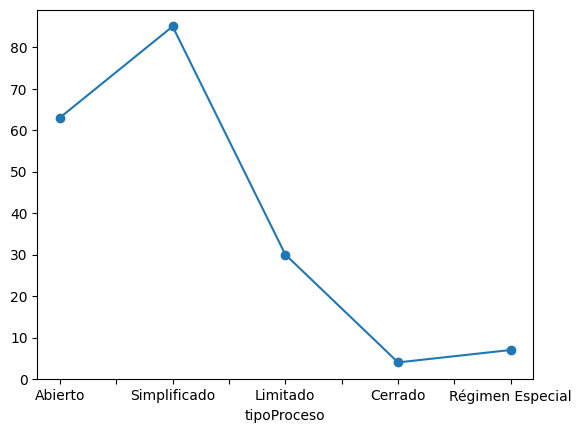

In [74]:
# Gráfica de tendencia
pd.crosstab(datos['tipoProceso'], datos['desviacionCosto'])[1].plot(marker='o')

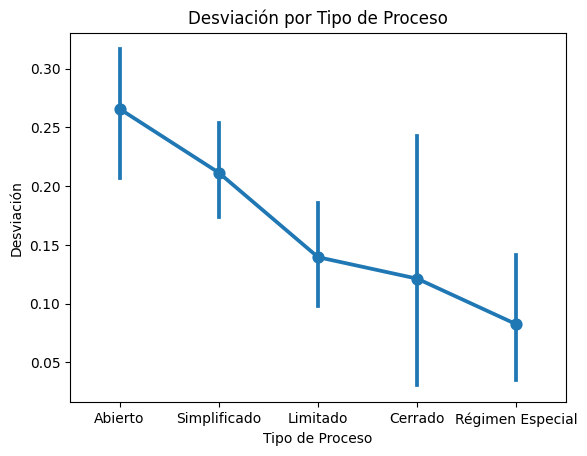

In [75]:
# Intervalos de confianza
sns.pointplot(x='tipoProceso', y='desviacionCosto', data=datos)
plt.xlabel('Tipo de Proceso')
plt.ylabel('Desviación')
plt.title('Desviación por Tipo de Proceso')
plt.show()

## Categorización de los proyectos por tipo de obra

In [76]:
# Asignar tipo de obra basado en la descripción del contrato
datos['categoriaObraConstruccion'] = datos['descripcionContrato'].str.contains('CONSTRUCCION|PAVIMENTACION|COSNTRUCCION|COSNTRUCCION|CONTRUCCION|CONSTRUIR|ADECUACUACION', regex=True)
datos['categoriaObraMantenimiento'] = datos['descripcionContrato'].str.contains('MANTENIMIENTO|MANTEMIENTO|MANTENER|MANTEMIENTO|MATENIMIENTO|MANTANIMIENTO|MANTENIIENTO|MATENIMIENTO|MANTANIMIENTO|MANTANIMIENTO|MANTENIIENTO', regex=True)
datos['categoriaObraRehabilitacion'] = datos['descripcionContrato'].str.contains('REHABILITACION|REHABILITAR|REHABLITACION|RECUPERACION|REHABLITACION', regex=True)
datos['categoriaObraMejoramiento'] = datos['descripcionContrato'].str.contains('MEJORAMIENTO|MEJORAR|MEJORAMENTO|MEJORAMAIENTO|MEKJORAMIENTO|MEJORAMAIENTO|MEJORAMENTO|MEKJORAMIENTO|MEJORAMENTO', regex=True)

In [77]:
# Calcular el total de categorías de obra detectadas
datos['totalCategoriaObra'] = np.int32(datos['categoriaObraConstruccion'] + datos['categoriaObraMantenimiento'] + datos['categoriaObraRehabilitacion'] + datos['categoriaObraMejoramiento'])

In [78]:
# Verificar el número de categorías por proyecto
datos['totalCategoriaObra'].value_counts()

,count
totalCategoriaObra,
1,929
0,44


In [79]:
# Identificar aquellos contratos que no caen en ninguna de las categorías
datos['categoriaObraOtros'] = datos['totalCategoriaObra'] == 0

# Lista de columnas de tipos de obra
categoriasObra = ['categoriaObraConstruccion',
                  'categoriaObraMantenimiento',
                  'categoriaObraRehabilitacion',
                  'categoriaObraMejoramiento',
                  'categoriaObraOtros']

# Crear la columna 'categoriaObra' para almacenar el tipo de obra
datos['categoriaObra'] = ''

# Asignar el tipo de obra según la coincidencia
for col in categoriasObra:
    datos.loc[datos[col] == True, 'categoriaObra'] = col.replace('categoriaObra', '')

# Eliminar las columnas utilizadas para la detección y el total calculado
datos.drop(columns=categoriasObra + ['totalCategoriaObra'], inplace=True)

# Filtrar filas donde el tipo de obra no sea "Otros"
datos = datos.loc[~datos['categoriaObra'].isin(['Otros'])].copy()

In [80]:
# Ordenar las categorías de obra en el DataFrame
ordenCategoriaObra = ['Construccion', 'Mejoramiento', 'Rehabilitacion', 'Mantenimiento']
datos['categoriaObra'] = pd.Categorical(datos['categoriaObra'], categories=ordenCategoriaObra, ordered=True)

In [81]:
# Ordenar las categorías de obra en el DataFrame
datos.groupby(['categoriaObra']).size()

,0
categoriaObra,
Construccion,263
Mejoramiento,480
Rehabilitacion,43
Mantenimiento,143


In [82]:
# Desviaciones en tiempo por tipo de obra


In [83]:
# Desviaciones en costo por tipo de obra


## Identificación de datos atípicos

In [84]:
# Seleccionar columnas relevantes
columnasSeleccionadasParaDeteccionOutliers = [
    'annoFirmaContrato',
    'valorProceso_SalarioMinimo',
    'valorContrato_SalarioMinimo',
    'duracionContrato',
    'intensidadProyecto_SalarioMinimo',
    'nivelEntidad',
    'tipoProceso',
    'categoriaObra',
    'regionEntidad'
]

# Crear un conjunto de datos con los atributos seleccionados para el análisis
datos_deteccion_outliers = datos[columnasSeleccionadasParaDeteccionOutliers].copy()

# Definir las variables categóricas
columnas_categoricas = ['nivelEntidad', 'tipoProceso', 'categoriaObra', 'regionEntidad']
datos_deteccion_outliers = pd.get_dummies(datos_deteccion_outliers, columns=columnas_categoricas, dtype=int)

# Manejar valores faltantes (si los hay)
datos_deteccion_outliers = datos_deteccion_outliers.dropna()

# Escalar los datos para SVM
escalador = StandardScaler()
datos_escalados = escalador.fit_transform(datos_deteccion_outliers)


In [85]:
# Datos con variables dummies
datos_deteccion_outliers

,annoFirmaContrato,valorProceso_SalarioMinimo,valorContrato_SalarioMinimo,duracionContrato,intensidadProyecto_SalarioMinimo,nivelEntidad_Departamento Centralizado,nivelEntidad_Departamento Descentralizado,nivelEntidad_Nacional Centralizado,nivelEntidad_Nacional Descentralizado,nivelEntidad_Tipo 1,nivelEntidad_Tipo 2,nivelEntidad_Tipo 3,nivelEntidad_Tipo 4,nivelEntidad_Tipo 5,nivelEntidad_Tipo 6,tipoProceso_Abierto,tipoProceso_Simplificado,tipoProceso_Limitado,tipoProceso_Cerrado,tipoProceso_Régimen Especial,categoriaObra_Construccion,categoriaObra_Mejoramiento,categoriaObra_Rehabilitacion,categoriaObra_Mantenimiento,regionEntidad_AMAZONIA,regionEntidad_ANDINA,regionEntidad_CARIBE,regionEntidad_ORINOQUIA,regionEntidad_PACIFICA
0,2015,80.639404,80.639404,60,1.343990,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
1,2015,232.792655,232.792653,60,3.879878,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,2022,150.000000,142.967967,240,0.595700,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,2020,184.669046,184.648202,90,2.051647,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0
4,2021,514.588207,486.268778,30,16.208959,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,2015,57.391455,57.391435,30,1.913048,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
975,2019,27.773887,27.773887,20,1.388694,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0
976,2021,27.958268,27.892322,45,0.619829,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0
977,2019,98.206091,98.192863,20,4.909643,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0


In [86]:
# Datos Escalados
datos_escalados

array([[-1.50409376, -0.26341158, -0.26361007, ...,  4.9805176 ,
        -0.28766401, -0.32752185],
       [-1.50409376, -0.18715673, -0.18654885, ..., -0.20078234,
        -0.28766401, -0.32752185],
       [ 1.83189592, -0.22865004, -0.23204245, ..., -0.20078234,
        -0.28766401, -0.32752185],
       ...,
       [ 1.35532596, -0.28981385, -0.29032494, ..., -0.20078234,
        -0.28766401, -0.32752185],
       [ 0.40218605, -0.25460766, -0.25471975, ..., -0.20078234,
        -0.28766401, -0.32752185],
       [ 0.40218605, -0.06274957, -0.06083503, ..., -0.20078234,
        -0.28766401, -0.32752185]])

In [87]:
# 1. Isolation Forest (Bosque de Aislamiento)
bosque_aislamiento = IsolationForest(contamination=0.05, random_state=42)
datos['bosque_aislamiento_outlier'] = bosque_aislamiento.fit_predict(datos_deteccion_outliers)

# 2. Local Outlier Factor (LOF) (Factor de Aislamiento Local)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
datos['lof_outlier'] = lof.fit_predict(datos_deteccion_outliers)

# 3. One-Class SVM (Máquina de Soporte Vectorial de una Clase)
svm = OneClassSVM(nu=0.05, kernel='rbf', gamma='auto')
datos['svm_outlier'] = svm.fit_predict(datos_escalados)

# Consolidar los resultados de los 3 algoritmos
columnas_outliers = ['bosque_aislamiento_outlier',
                     'lof_outlier',
                     'svm_outlier']

# Crear una columna que cuente la cantidad de votos de cada algoritmo
datos['votos_outlier'] = datos[columnas_outliers].apply(lambda x: sum(x == -1), axis=1)

# Calcular la probabilidad de ser un outlier basado en el número de votos
datos['probabilidad_outlier'] = datos['votos_outlier'] / len(columnas_outliers)

# Crear una columna que consolide el resultado final (es un outlier si al menos 2 algoritmos lo detectan)
datos['es_outlier'] = datos['votos_outlier'].apply(lambda x: 1 if x >= 2 else 0)

In [88]:
# Outliers detectados por cada algoritmo
datos[['bosque_aislamiento_outlier', 'lof_outlier', 'svm_outlier']].apply(lambda x: sum(x == -1))

,0
bosque_aislamiento_outlier,47
lof_outlier,47
svm_outlier,62


In [89]:
# Votos por contrato
(
    datos
    .groupby('votos_outlier')['votos_outlier']
    .size()
    .reset_index(name='cantidad')
    .assign(porcentaje=lambda x: round(x['cantidad'] / x['cantidad'].sum() * 100, 2))
)


,votos_outlier,cantidad,porcentaje
0,0,809,87.08
1,1,93,10.01
2,2,18,1.94
3,3,9,0.97
